In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path # Path module of pathlib is used to store path
import os
import cv2
from google.colab.patches import cv2_imshow

#Choix du dataset : 
# - dataset_updated (jeu Kaggle complet : 9000 images, 8695 comptées ???)
# - Data-for-test (jeu réduit 10%), 
data_set_path = "/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated"
#data_set_path = "/content/drive/MyDrive/FS18-Luc-Fred-Nansa/Data-for-test"

global_data = Path(data_set_path+'/global_set/') 
training_data = Path(data_set_path+'/training_set/') 
validation_data = Path(data_set_path+'/validation_set/')

# fix file size for feature extraction
fixed_size_ft_extract  = tuple((224, 224))

#Choose global_data / training_data / validation_data
data = global_data


In [5]:
#------------------------------------------------
# Testing feature-descriptor -1:  Hu Moments
# => 7 features basées sur les contours
#------------------------------------------------
def fd_Hu_Momments_test (path, n):

    for folder in sorted(os.listdir(path)):
        # Define the path to the images
        imgs_path = path / folder
        
        # Récupération de la n-ième image du dossier de la classe
        image_name = str(sorted(imgs_path.glob('*'))[n])
        image = cv2.imread(image_name)
        image = cv2.resize(image,fixed_size_ft_extract)
                                          
        # Displaying the image name and picture
        display(image_name)
        cv2_imshow(image)

        # convert the image to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Compute the HuMoments feature 
        HuMoments_flat = cv2.HuMoments(cv2.moments(image)).flatten()
        
        # Display HuMoments features
        display(HuMoments_flat)

In [6]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 30.4 MB/s 


In [7]:
#------------------------------------------------
# Testing feature-descriptor -2 Haralick Texture
# => 13 features basées sur l'analyse de texture (pixels adjacents)
#------------------------------------------------
import mahotas
def fd_haralick_test (path, n):

    for folder in sorted(os.listdir(path)):
        # Define the path to the images
        imgs_path = path / folder
        
        # Récupération de la n-ième image du dossier de la classe
        image_name = str(sorted(imgs_path.glob('*'))[n])
        image = cv2.imread(image_name)
        image = cv2.resize(image,fixed_size_ft_extract)
                                            
        # Displaying the image name and picture
        display(image_name)
        cv2_imshow(image)

        # convert the image to grayscale
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        
        # Compute the haralick texture feature => 4 * 13 feature
        haralic = mahotas.features.haralick(image)
        # Compute the haralick texture features => 13 feature
        haralic_mean = haralic.mean(axis=0)

        # Display harlic features
        display(haralic)
        display(haralic_mean)


In [8]:
#------------------------------------------------
# Testing feature-descriptor -3 Color Histogram
# => 8x8x8 = 512 features basées sur les histo de couleur
#------------------------------------------------
def fd_Color_Histogram_test (path, n):
    # bins for histograms 
    bins = 8
    
    for folder in sorted(os.listdir(path)):

        # Define the path to the images
        imgs_path = path / folder
    
        # Récupération de la n-ième image du dossier de la classe
        image_name = str(sorted(imgs_path.glob('*'))[n])
        image = cv2.imread(image_name)
        image = cv2.resize(image,fixed_size_ft_extract)
                                            
        # Displaying the image name and picture
        display(image_name)
        cv2_imshow(image)

        # convert the image to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        #COPUTE THE COLOR HISTOGRAM
        hist  = cv2.calcHist([image],[0,1,2],None,[bins,bins,bins],[0, 256, 0, 256, 0, 256])
        #images: list of images as numpy arrays. All images must be of the same dtype and same size.
        #channels: list of the channels used to calculate the histograms.
        #mask: optional mask (8 bit array) of the same size as the input image.
        #histSize: histogram sizes in each dimension
        #ranges: Array of the dims arrays of the histogram bin boundaries in each dimension

        # normalize and flat the histogram
        cv2.normalize(hist,hist)
        hist_flat = hist.flatten()
        
        # Display histogram color
        display(hist)
        display(hist_flat)
    

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/drawings/10288_mainfoto_05.jpg'

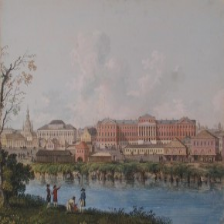

array([[ 4.74361417e-03,  7.25791560e+01,  9.76627190e-01,
         1.55264077e+03,  4.36957641e-01,  2.65357623e+02,
         6.13798393e+03,  7.44892756e+00,  1.02114274e+01,
         8.45558721e-04,  3.50154859e+00, -4.25211105e-01,
         9.97983807e-01],
       [ 3.86598632e-03,  1.07086971e+02,  9.65399475e-01,
         1.54747612e+03,  3.81216969e-01,  2.65523497e+02,
         6.08281753e+03,  7.45441513e+00,  1.05339844e+01,
         6.80918820e-04,  3.83930503e+00, -3.75079425e-01,
         9.96129286e-01],
       [ 5.13134986e-03,  5.08020900e+01,  9.83576803e-01,
         1.54665656e+03,  4.46066368e-01,  2.65444146e+02,
         6.13582415e+03,  7.45337565e+00,  1.00838062e+01,
         8.67977049e-04,  3.40698124e+00, -4.45069709e-01,
         9.98442962e-01],
       [ 3.91706168e-03,  1.06118201e+02,  9.65713512e-01,
         1.54752217e+03,  3.83020906e-01,  2.65522532e+02,
         6.08397046e+03,  7.45322446e+00,  1.05124593e+01,
         6.90234170e-04,  3.82953932e

array([ 4.41450301e-03,  8.41466045e+01,  9.72829245e-01,  1.54857391e+03,
        4.11815471e-01,  2.65461950e+02,  6.11014902e+03,  7.45248570e+00,
        1.03354193e+01,  7.71172190e-04,  3.64434354e+00, -4.05940709e-01,
        9.97212228e-01])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/engraving/101.jpg'

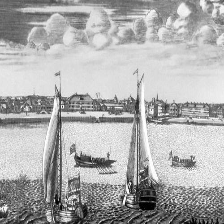

array([[ 4.42030491e-04,  8.64245796e+02,  8.61095387e-01,
         3.11093266e+03,  1.46207867e-01,  3.46926890e+02,
         1.15794848e+04,  8.26298098e+00,  1.31400441e+01,
         1.41161907e-04,  5.47651308e+00, -2.13941153e-01,
         9.78294013e-01],
       [ 3.48312879e-04,  1.29030795e+03,  7.91405250e-01,
         3.09285816e+03,  1.10705072e-01,  3.47557039e+02,
         1.10811247e+04,  8.25174258e+00,  1.34407779e+01,
         9.79491200e-05,  5.88541600e+00, -1.71655996e-01,
         9.59085922e-01],
       [ 4.22051951e-04,  8.66454276e+02,  8.59942208e-01,
         3.09320268e+03,  1.37205587e-01,  3.47575753e+02,
         1.15063564e+04,  8.26298358e+00,  1.32377978e+01,
         1.22337738e-04,  5.59044006e+00, -1.99297472e-01,
         9.72942252e-01],
       [ 3.61041686e-04,  1.19623978e+03,  8.06604176e-01,
         3.09272391e+03,  1.15389191e-01,  3.47558205e+02,
         1.11746559e+04,  8.26080025e+00,  1.34047833e+01,
         1.02351383e-04,  5.82712437e

array([ 3.93359252e-04,  1.05431195e+03,  8.29761755e-01,  3.09742935e+03,
        1.27376929e-01,  3.47404472e+02,  1.13354055e+04,  8.25962685e+00,
        1.33058508e+01,  1.15950037e-04,  5.69487338e+00, -1.90360279e-01,
        9.68075639e-01])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/iconography/100.jpg'

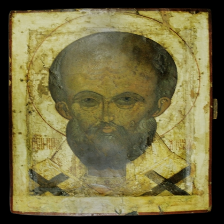

array([[ 2.01493959e-02,  2.00070348e+02,  9.73657588e-01,
         3.79749483e+03,  2.75128098e-01,  2.15716688e+02,
         1.49899090e+04,  7.76402044e+00,  1.14546841e+01,
         3.55499043e-04,  4.44534506e+00, -3.36330492e-01,
         9.95117525e-01],
       [ 1.81430697e-02,  3.38927547e+02,  9.54955271e-01,
         3.76212220e+03,  2.36892320e-01,  2.16684027e+02,
         1.47095613e+04,  7.80608790e+00,  1.18223406e+01,
         2.74010808e-04,  4.84556915e+00, -2.87497446e-01,
         9.90513604e-01],
       [ 2.02112670e-02,  2.21996276e+02,  9.70770694e-01,
         3.79749483e+03,  2.74691243e-01,  2.15716688e+02,
         1.49679830e+04,  7.76177828e+00,  1.14733906e+01,
         3.52671271e-04,  4.47434926e+00, -3.33613570e-01,
         9.94930922e-01],
       [ 1.81603103e-02,  3.66793099e+02,  9.51251836e-01,
         3.76212220e+03,  2.34695811e-01,  2.16684027e+02,
         1.46816957e+04,  7.80631453e+00,  1.18595257e+01,
         2.66485443e-04,  4.89667632e

array([ 1.91660107e-02,  2.81946817e+02,  9.62658847e-01,  3.77980852e+03,
        2.55351868e-01,  2.16200358e+02,  1.48372872e+04,  7.78455029e+00,
        1.16524852e+01,  3.12166641e-04,  4.66548495e+00, -3.09888142e-01,
        9.92584868e-01])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/painting/0003.jpg'

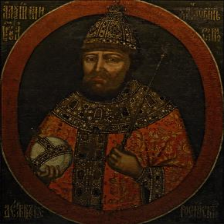

array([[ 1.46264192e-03,  1.20243213e+02,  7.79662355e-01,
         2.72861256e+02,  2.56118610e-01,  6.50110306e+01,
         9.71201812e+02,  6.81693063e+00,  1.06547285e+01,
         6.13615514e-04,  4.15807849e+00, -1.88937709e-01,
         9.44312609e-01],
       [ 1.05297795e-03,  1.73030747e+02,  6.83071654e-01,
         2.72980863e+02,  1.91820764e-01,  6.50855235e+01,
         9.18892704e+02,  6.78986418e+00,  1.09818662e+01,
         4.50513835e-04,  4.50382249e+00, -1.33705631e-01,
         8.90330514e-01],
       [ 1.27404599e-03,  1.16413157e+02,  7.87346296e-01,
         2.73715328e+02,  2.25858101e-01,  6.49114350e+01,
         9.78448154e+02,  6.82969881e+00,  1.07122945e+01,
         5.63928029e-04,  4.19987127e+00, -1.80760707e-01,
         9.38624130e-01],
       [ 1.05591025e-03,  1.75629733e+02,  6.78305952e-01,
         2.72976349e+02,  1.91616422e-01,  6.50857447e+01,
         9.16275662e+02,  6.79192162e+00,  1.09729582e+01,
         4.53052641e-04,  4.49622851e

array([ 1.21139403e-03,  1.46329212e+02,  7.32096564e-01,  2.73133449e+02,
        2.16353474e-01,  6.50234335e+01,  9.46204583e+02,  6.80710381e+00,
        1.08304618e+01,  5.20277505e-04,  4.33950019e+00, -1.59654011e-01,
        9.16410114e-01])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/sculpture/100.jpg'

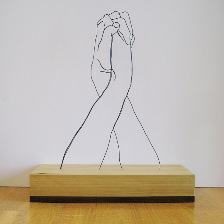

array([[ 9.41067021e-03,  2.40617052e+02,  9.14086149e-01,
         1.40033912e+03,  5.71231502e-01,  3.68313681e+02,
         5.36073943e+03,  6.81158590e+00,  8.56887159e+00,
         1.21254494e-03,  2.55029727e+00, -5.31106867e-01,
         9.98981192e-01],
       [ 8.74248309e-03,  3.08924692e+02,  8.89893992e-01,
         1.40285121e+03,  5.22990389e-01,  3.68413642e+02,
         5.30248015e+03,  6.81406161e+00,  8.81963124e+00,
         1.05745460e-03,  2.93603339e+00, -4.86988416e-01,
         9.98287474e-01],
       [ 9.28501347e-03,  1.89574151e+02,  9.32212823e-01,
         1.39830392e+03,  5.42500065e-01,  3.68409433e+02,
         5.40364154e+03,  6.80090742e+00,  8.69278530e+00,
         1.09909542e-03,  2.80954505e+00, -5.09823863e-01,
         9.98693628e-01],
       [ 8.69422196e-03,  2.55626636e+02,  9.08889282e-01,
         1.40283515e+03,  5.20899033e-01,  3.68413944e+02,
         5.35571397e+03,  6.81653798e+00,  8.81613960e+00,
         1.05628817e-03,  2.92521780e

array([ 9.03309718e-03,  2.48685633e+02,  9.11270562e-01,  1.40108235e+03,
        5.39405247e-01,  3.68387675e+02,  5.35564377e+03,  6.81077323e+00,
        8.72435693e+00,  1.10634578e-03,  2.80527338e+00, -5.03879509e-01,
        9.98565499e-01])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/drawings/10288_mainfoto_05.jpg'

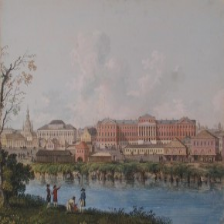

array([ 1.16969321e-03,  4.92517197e-09,  2.43157414e-11,  1.65184224e-11,
        2.99948592e-22, -6.93685261e-16,  1.40094496e-22])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/engraving/101.jpg'

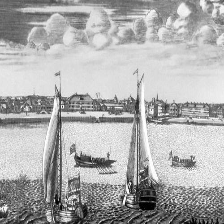

array([ 8.96348366e-04,  5.22700840e-09,  5.15712745e-13,  1.24996398e-12,
       -9.85638469e-25, -6.40549752e-17,  1.88894642e-25])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/iconography/100.jpg'

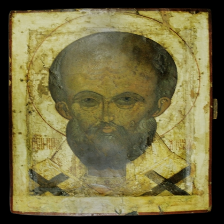

array([ 1.36724555e-03,  1.10293376e-09,  1.17391738e-11,  4.56736497e-13,
       -1.02327522e-24, -1.55822003e-18, -2.67216127e-25])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/painting/0003.jpg'

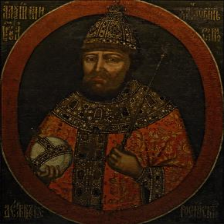

array([ 4.88683228e-03,  5.91648138e-08,  1.07836057e-09,  7.84061898e-12,
       -3.01453493e-22, -1.80509167e-15,  6.54904868e-22])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/sculpture/100.jpg'

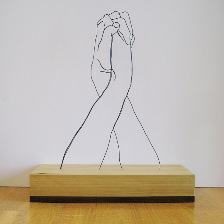

array([ 8.65504981e-04,  2.20635749e-09,  1.06967898e-13,  1.33985067e-12,
        4.26540556e-25, -5.83613563e-17,  2.74505018e-25])

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/drawings/10288_mainfoto_05.jpg'

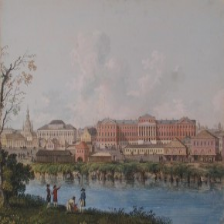

array([[[0.00000000e+00, 1.03212064e-02, 2.21168697e-02, 3.15955281e-02,
         9.67876390e-02, 8.69982898e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.21273708e-02, 6.17166013e-02, 7.80409575e-02,
         1.04212590e-01, 3.11215967e-02, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 5.32384664e-02, 1.04370564e-01, 1.02158882e-01,
         1.14744432e-01, 1.19536417e-02, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.58292712e-03, 2.68035401e-02, 2.11163461e-02,
         1.00052506e-02, 4.21273726e-04, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.57977644e-04, 1.21116196e-03, 1.05318431e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00

array([0.00000000e+00, 1.03212064e-02, 2.21168697e-02, 3.15955281e-02,
       9.67876390e-02, 8.69982898e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.21273708e-02, 6.17166013e-02, 7.80409575e-02,
       1.04212590e-01, 3.11215967e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.32384664e-02, 1.04370564e-01, 1.02158882e-01,
       1.14744432e-01, 1.19536417e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.58292712e-03, 2.68035401e-02, 2.11163461e-02,
       1.00052506e-02, 4.21273726e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.57977644e-04, 1.21116196e-03, 1.05318431e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/engraving/101.jpg'

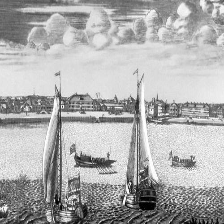

array([[[0.02347106, 0.06320139, 0.15817831, 0.2993106 , 0.24629311,
         0.25429162, 0.7934703 , 0.35486314],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ,
         

array([0.02347106, 0.06320139, 0.15817831, 0.2993106 , 0.24629311,
       0.25429162, 0.7934703 , 0.35486314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/iconography/100.jpg'

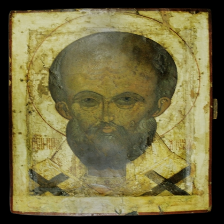

array([[[6.08299494e-01, 2.41101661e-04, 6.42937783e-04, 4.01836121e-04,
         1.36624277e-03, 5.86680742e-03, 8.03672228e-05, 0.00000000e+00],
        [2.25028233e-03, 1.60734449e-03, 9.96553525e-03, 4.32375669e-02,
         2.50745732e-02, 6.55796528e-02, 8.37426484e-02, 0.00000000e+00],
        [4.33983002e-03, 5.14350226e-03, 7.69114345e-02, 9.30652469e-02,
         6.20434955e-02, 3.06922436e-01, 1.82031766e-01, 0.00000000e+00],
        [6.10790914e-03, 3.67278196e-02, 9.83694792e-02, 9.01720226e-02,
         1.26578376e-01, 4.61307853e-01, 3.63259837e-02, 0.00000000e+00],
        [9.72443353e-03, 3.72903906e-02, 7.17679337e-02, 1.46027237e-01,
         2.40860566e-01, 2.90366769e-01, 6.67047966e-03, 0.00000000e+00],
        [1.06084738e-02, 3.84958982e-02, 3.63259837e-02, 8.35015476e-02,
         1.54867634e-01, 6.75084665e-02, 0.00000000e+00, 0.00000000e+00],
        [8.27782415e-03, 2.98162401e-02, 3.49597409e-02, 2.57175118e-02,
         1.37427952e-02, 1.92881329e-03, 0.00

array([6.08299494e-01, 2.41101661e-04, 6.42937783e-04, 4.01836121e-04,
       1.36624277e-03, 5.86680742e-03, 8.03672228e-05, 0.00000000e+00,
       2.25028233e-03, 1.60734449e-03, 9.96553525e-03, 4.32375669e-02,
       2.50745732e-02, 6.55796528e-02, 8.37426484e-02, 0.00000000e+00,
       4.33983002e-03, 5.14350226e-03, 7.69114345e-02, 9.30652469e-02,
       6.20434955e-02, 3.06922436e-01, 1.82031766e-01, 0.00000000e+00,
       6.10790914e-03, 3.67278196e-02, 9.83694792e-02, 9.01720226e-02,
       1.26578376e-01, 4.61307853e-01, 3.63259837e-02, 0.00000000e+00,
       9.72443353e-03, 3.72903906e-02, 7.17679337e-02, 1.46027237e-01,
       2.40860566e-01, 2.90366769e-01, 6.67047966e-03, 0.00000000e+00,
       1.06084738e-02, 3.84958982e-02, 3.63259837e-02, 8.35015476e-02,
       1.54867634e-01, 6.75084665e-02, 0.00000000e+00, 0.00000000e+00,
       8.27782415e-03, 2.98162401e-02, 3.49597409e-02, 2.57175118e-02,
       1.37427952e-02, 1.92881329e-03, 0.00000000e+00, 0.00000000e+00,
      

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/painting/0003.jpg'

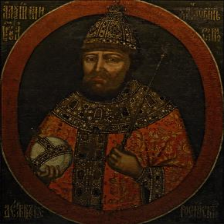

array([[[2.19098032e-02, 3.95483803e-04, 7.90967606e-05, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.95037258e-02, 6.56503113e-03, 8.70064367e-04, 3.95483803e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.45652848e-01, 4.03393470e-02, 1.57402549e-02, 3.24296718e-03,
         6.32774085e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.87042141e-01, 1.42690554e-01, 4.77744415e-02, 1.93787068e-02,
         3.40116071e-03, 7.90967606e-05, 0.00000000e+00, 0.00000000e+00],
        [1.83346286e-01, 2.19889000e-01, 7.66447634e-02, 2.28589643e-02,
         2.84748338e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.20385267e-01, 3.41777116e-01, 9.15940478e-02, 2.76838653e-02,
         6.16954733e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.75263044e-02, 4.93880183e-01, 2.43697122e-01, 9.04866904e-02,
         1.26554817e-03, 0.00000000e+00, 0.00

array([2.19098032e-02, 3.95483803e-04, 7.90967606e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.95037258e-02, 6.56503113e-03, 8.70064367e-04, 3.95483803e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.45652848e-01, 4.03393470e-02, 1.57402549e-02, 3.24296718e-03,
       6.32774085e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.87042141e-01, 1.42690554e-01, 4.77744415e-02, 1.93787068e-02,
       3.40116071e-03, 7.90967606e-05, 0.00000000e+00, 0.00000000e+00,
       1.83346286e-01, 2.19889000e-01, 7.66447634e-02, 2.28589643e-02,
       2.84748338e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.20385267e-01, 3.41777116e-01, 9.15940478e-02, 2.76838653e-02,
       6.16954733e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.75263044e-02, 4.93880183e-01, 2.43697122e-01, 9.04866904e-02,
       1.26554817e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

'/content/drive/MyDrive/FS18-Luc-Fred-Nansa/dataset_updated/global_set/sculpture/100.jpg'

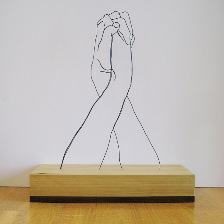

array([[[9.5794087e-05, 0.0000000e+00, 0.0000000e+00, 1.9158817e-04,
         4.3107339e-04, 5.4267351e-02, 2.9207617e-01, 4.7897043e-05],
        [4.3107339e-04, 9.5794087e-05, 9.5794087e-05, 0.0000000e+00,
         2.3948522e-04, 8.2861884e-03, 2.3996418e-02, 0.0000000e+00],
        [3.4006902e-03, 2.0595728e-03, 2.8738225e-04, 3.8317635e-04,
         5.7476450e-04, 1.9829376e-02, 4.1718327e-02, 0.0000000e+00],
        [6.9450713e-03, 1.4848083e-02, 2.3948522e-04, 6.2266155e-04,
         1.2453231e-03, 4.2197295e-02, 9.6273059e-03, 0.0000000e+00],
        [4.9333954e-03, 1.2596922e-02, 9.5794088e-04, 2.6822344e-03,
         2.2846889e-02, 9.5075630e-02, 1.8679847e-03, 0.0000000e+00],
        [6.2266155e-04, 1.2932202e-03, 2.0116759e-03, 3.4485871e-03,
         8.0227546e-02, 1.5920977e-01, 1.2932202e-03, 0.0000000e+00],
        [1.4369113e-04, 9.5794087e-05, 0.0000000e+00, 9.5794087e-05,
         1.0010482e-02, 1.1686878e-02, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0

array([9.5794087e-05, 0.0000000e+00, 0.0000000e+00, 1.9158817e-04,
       4.3107339e-04, 5.4267351e-02, 2.9207617e-01, 4.7897043e-05,
       4.3107339e-04, 9.5794087e-05, 9.5794087e-05, 0.0000000e+00,
       2.3948522e-04, 8.2861884e-03, 2.3996418e-02, 0.0000000e+00,
       3.4006902e-03, 2.0595728e-03, 2.8738225e-04, 3.8317635e-04,
       5.7476450e-04, 1.9829376e-02, 4.1718327e-02, 0.0000000e+00,
       6.9450713e-03, 1.4848083e-02, 2.3948522e-04, 6.2266155e-04,
       1.2453231e-03, 4.2197295e-02, 9.6273059e-03, 0.0000000e+00,
       4.9333954e-03, 1.2596922e-02, 9.5794088e-04, 2.6822344e-03,
       2.2846889e-02, 9.5075630e-02, 1.8679847e-03, 0.0000000e+00,
       6.2266155e-04, 1.2932202e-03, 2.0116759e-03, 3.4485871e-03,
       8.0227546e-02, 1.5920977e-01, 1.2932202e-03, 0.0000000e+00,
       1.4369113e-04, 9.5794087e-05, 0.0000000e+00, 9.5794087e-05,
       1.0010482e-02, 1.1686878e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [10]:
# Test d'affichage des features générées
fd_haralick_test(data,2) # 7 (contours)
fd_Hu_Momments_test(data,2) # 13 (textures)
fd_Color_Histogram_test(data,2) # 512 (couleurs)

In [11]:
# get the dataset labels 
labels_name = os.listdir(data)

# sort the training labesl 
labels_name.sort()
print(labels_name)


['drawings', 'engraving', 'iconography', 'painting', 'sculpture']
